<a id='1'></a>



# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Table of Contents</p>

* [Problem Stetement](#sectionone)

* [Initialization](#sectiontwo)

    - [Loading Modules](#sectiontwo-one)

    - [Loading Data](#sectiontwo-two)

* [EDA](#sectionthree)

    - [Renaming Column](#sectionthree-one)

    - [Shape Of Data](#sectionthree-two)

    - [Merging Twitter and Reddit Data](#sectionthree-three)

    - [Visualization](#sectionthree-four)

        - [Ratio Of Categorical Labels](#sectionthree-four-one)

        - [String Length Distribution](#sectionthree-four-two)

        - [Word Count DIstribution](#sectionthree-four-three)

        - [Top Word Distribution](#sectionthree-four-four)

* [Preprocessing](#sectionfour)

    - [Renaming Target Labels](#sectionfour-one)

    - [Data Distribution](#sectionfour-two)

    - [Check For NUll](#sectionfour-three)

    - [Dropping Null](#sectionfour-four)

    - [Abbreveation Creation](#sectionfour-five)

    - [WordCloud](#sectionfour-six)

    - [Filters](#sectionfour-seven)

    - [Calculate Maximum Sequence Length](#sectionfour-eight)

    - [Tokenization & Padding](#sectionfour-nine)

    - [Transforming Target Label](#sectionfour-ten)

* [Model Selection](#sectionfive)

    - [Dense Architecture](#sectionfive-one)

    - [Model Summary](#sectionfive-two)

    - [Model Visualization](#sectionfive-three)

* [Training](#sectionsix)

    - [Callback Function](#sectionsix-one)

    - [Train Test Split](#sectionsix-two)

    - [Fitting](#sectionsix-three)

* [Result & Evaluation](#sectionseven)

    - [Training Loss vs Validation Loss](#sectionseven-one)

    - [Training Accuracy vs Validation Accuracy](#sectionseven-two)

    - [ROC Curve](#sectionseven-three)

    - [Confusion Matrix](#sectionseven-four)

    - [Classification Report](#sectionseven-five)

* [Conclusions](#sectioneight)

<a id='sectionone'></a>



# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Problem Statement</p>

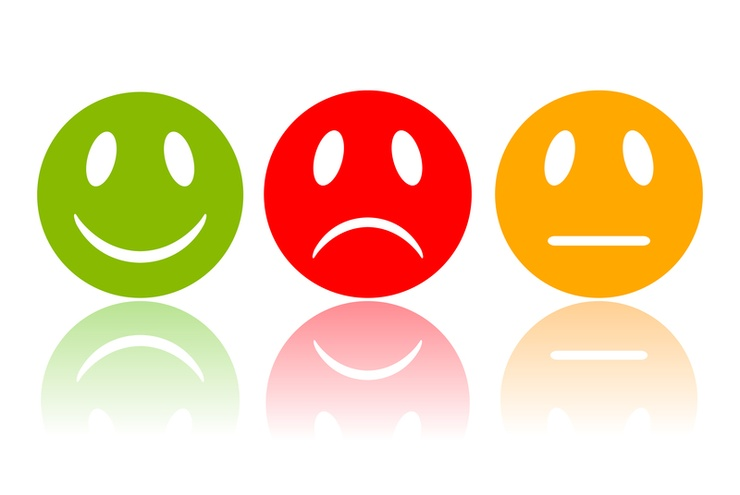

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Sentiment Analysis</p>



(or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.



### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Graded Sentiment Analysis</p>



If polarity precision is important to your business, you might consider expanding your polarity categories to include different levels of positive and negative:



> Very positive<br>

> Positive<br>

> Neutral<br>

> Negative<br>

> Very negative<br>



This is usually referred to as graded or fine-grained sentiment analysis, and could be used to interpret 5-star ratings in a review, for example:



### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">In Context of our Current Problem</p>



There two datasets Respectively one Consists of Tweets from Twitter with Sentimental Label and the other from Reddit which Consists of Comments with its Sentimental Label.



>1. Twitter Dataset<br>

>2. Reddit Dataset<br>



All these Tweets and Comments were extracted using there Respective Apis Tweepy and PRAW.

These tweets and Comments Were Made on Narendra Modi and Other Leaders as well as Peoples Opinion Towards the Next Prime Minister of The Nation ( In Context with General Elections Held In India - 2019).

All the Tweets and Comments From twitter and Reddit are Cleaned using Pythons re and also NLP with a Sentimental Label to each ranging from -1 to 1.



> 1.    0 Indicating it is a Neutral Tweet/Comment<br>

> 2.    1 Indicating a Postive Sentiment<br>

> 3.   -1 Indicating a Negative Tweet/Comment<br>

<a id ='sectiontwo'></a>



# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Initialization</p>

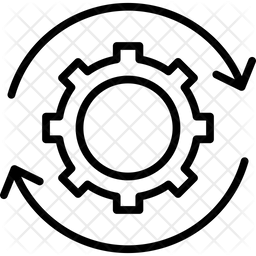

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Loaading Modules</p><a id='sectiontwo-one'></a>

In [30]:
!pip install keras

!pip install visualkeras

!pip install --no-cache-dir wordcloud

!pip install --no-cache-dir wordcloud nltk gensim tensorflow-hub tensorflow cufflinks plotly



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [31]:
# !pip install nltk

In [32]:
import nltk
nltk.download('wordnet') 
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
# !pip install gensim

In [34]:
# Import necessary libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import warnings
import string
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
import gensim.models
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import tensorflow as tf
from tensorflow.keras import initializers, preprocessing
import tensorflow_hub as hub
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to walk through the Kaggle input directory and print all filenames
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Example to generate and display a confusion matrix using ConfusionMatrixDisplay
# Assuming y_test and model.predict(X_test) have been defined

# Now you can write up to 20GB to the current directory (/kaggle/working/) 
# that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session.


/kaggle/input/reddit-twitter-data/Twitter_Data.csv
/kaggle/input/reddit-twitter-data/Reddit_Data.csv


## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Loading Data</p><a id='sectiontwo-two'></a>

In [35]:
df_reddit = pd.read_csv('/kaggle/input/reddit-twitter-data/Reddit_Data.csv')

df_twitter = pd.read_csv('/kaggle/input/reddit-twitter-data/Twitter_Data.csv')

<a id='sectionthree'></a>



# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">EDA</p>


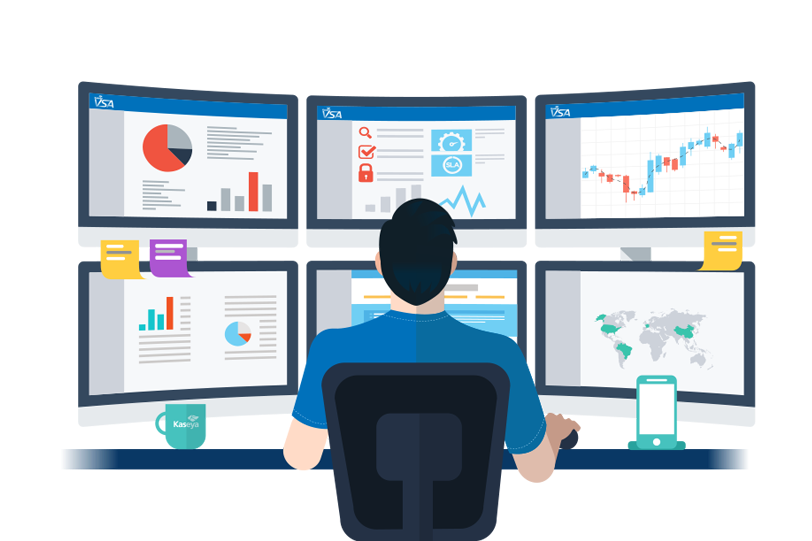

**Exploratory Data Analysis** refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


In this section we will try to explore the contents of the data and will try to understand its behaviour with context to its labels

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Renaming Column</p>

<a id ='sectionthree-one'></a>

Given two different dataset one fron twitter and another from Reddit, Idea is to using both the data set for training and etst validation

and for that need to make sure we merge properly and merge columns needs to be renamed.

In [36]:
df_twitter.rename(columns = {'clean_text':'clean_comment'}, inplace = True)

<a id='sectionthree-two'></a>

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Shape Of Data</p>

In [37]:
df_twitter.shape,  df_reddit.shape

((162980, 2), (37249, 2))

# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Merging Twitter and Reddit Data</p>

<a id='sectionthree-three'></a>

The reason behing merging both data and not using one for the training and another for test is to give diversity in training set and improving the in general performance of the model.



The more diverse the data is the more diverse our model will be.

The next step is merging both data and resetting the index values

In [38]:
df = pd.concat([df_reddit, df_twitter], ignore_index=True)

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Visualization</p>

<a id = 'sectionthree-four'></a>

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Ratio Of Categorical Plots</p>



<a id ='sectionthree-four-one'></a>

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Histogram Plot</p>

In [39]:
# !pip install cufflinks

In [40]:
import cufflinks as cf

cf.go_offline()

cf.set_config_file(offline=False, world_readable=True)



df['category'].iplot(

    kind='hist',

    xTitle='Categories',

    linecolor='black',

    yTitle='count',

    title='Category Distribution')

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">String Length Distribution</p>



<a id ='sectionthree-four-two'></a>

In [41]:
pd.DataFrame(df['clean_comment'].str.len())['clean_comment'].iplot(

    kind='hist',

    bins=70,

    xTitle='String length',

    linecolor='black',

    yTitle='count',

    title='String Length Distribution')

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Word Count Distribution</p>



<a id ='sectionthree-four-three'></a>

In [42]:
df['word_count'] = df['clean_comment'].str.split().str.len()

df['word_count'].iplot(

    kind='hist',

    bins=70,

    xTitle='String length',

    linecolor='black',

    yTitle='count',

    title='Word Count Distribution')

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Top Word Distribution</p>



<a id ='sectionthree-four-four'></a>

In [43]:
from sklearn.feature_extraction.text import CountVectorizer



def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)

    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0) 

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    return words_freq[:n]





common_words = get_top_n_words(df['clean_comment'].dropna().tolist(), 20)

df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(

    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words Combined')

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Sample Comment Distribution</p>

In [44]:
# !pip install plotly

In [47]:
# import plotly_express as px



# fig = px.histogram(df.head(500), x='clean_comment', color='category', histfunc='count')

# fig.update_layout(

#     title='text (first 500 rows) histogram', 

#     xaxis = dict(

#         showgrid=True, 

#         rangeslider = dict(

#             visible=True, 

#             thickness=0.05

#         )

#     ), 

#     yaxis = dict(

#         showgrid=True

#     ), 

#     legend = dict(

#         orientation='v'

#     ), 

#     barmode='group', 

#     paper_bgcolor='#FFFFFF'

# )

# fig.show(renderer="iframe")

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Target Distribution</p>

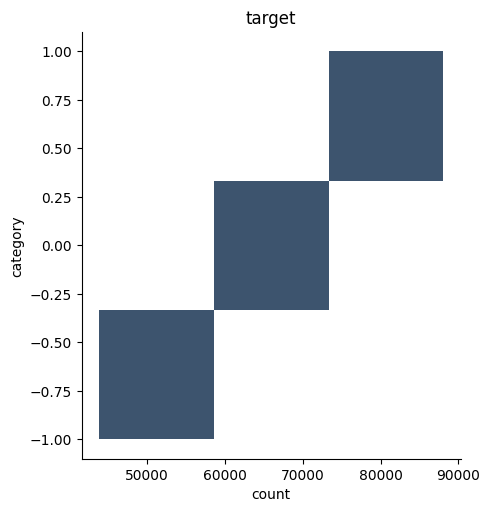

In [48]:
import matplotlib.pyplot as plt

import seaborn as sns



locations_vc = df["category"].value_counts()

sns.displot(y=locations_vc.index, x=locations_vc)

plt.title("target")

plt.show()

In [49]:
sns.kdeplot(df[df['category'] == -1]['clean_comment'].str.len(), shade=True, color='red')

/tmp/ipykernel_12/1466733055.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='clean_comment', ylabel='Density'>

/tmp/ipykernel_12/1631733317.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='clean_comment', ylabel='Density'>

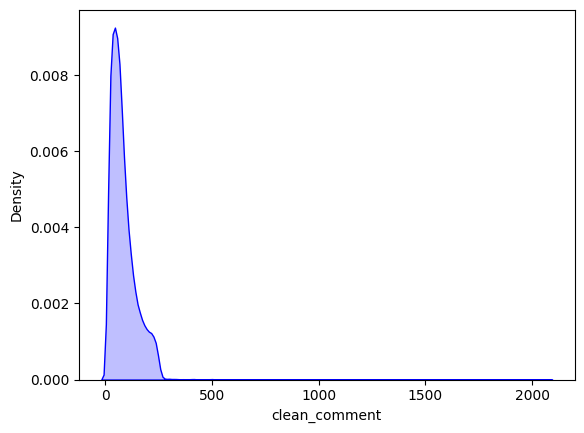

In [50]:
sns.kdeplot(df[df['category'] == 0]['clean_comment'].str.len(), shade=True, color= 'blue')

/tmp/ipykernel_12/2039150682.py:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='clean_comment', ylabel='Density'>

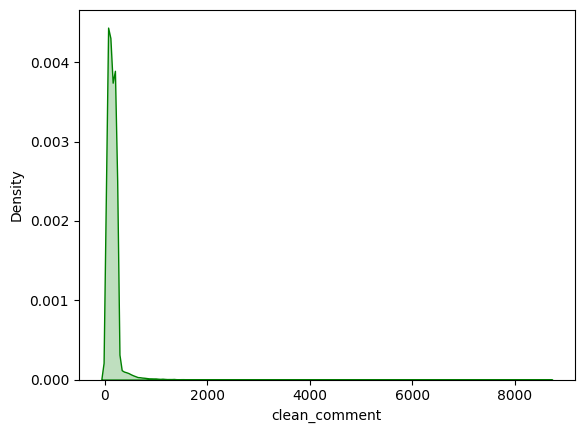

In [51]:
sns.kdeplot(df[df['category'] == 1]['clean_comment'].str.len(), shade=True, color= 'green')

### <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Target Distribution Heatmaps</p>

In [52]:
import plotly.express as px

# Construct the graph and style it. Further customize your graph by editing this code.

# See Plotly Documentation for help: https://plotly.com/python/plotly-express/

fig = px.density_heatmap(df, x='category')

fig.update_layout(

    title='label density heatmap', 

    xaxis = dict(

        showgrid=True, 

        rangeslider = dict(

            visible=True, 

            thickness=0.05

        )

    ), 

    yaxis = dict(

        showgrid=True

    ), 

    legend = dict(

        orientation='v'

    ), 

    paper_bgcolor='#FFFFFF'

)

fig.show(renderer="iframe")

<a id='sectionfour'></a>



# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Preprocessing</p>




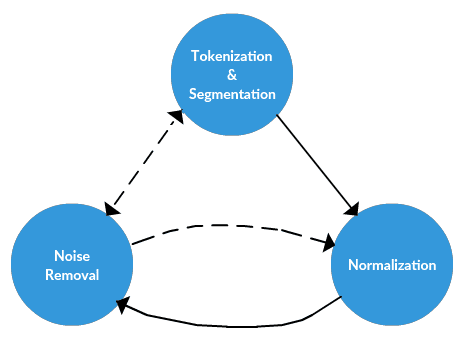

Data Preprocessing includes the steps we need to follow to transform or encode data so that it may be easily parsed by the machine. The main agenda for a model to be accurate and precise in predictions is that the algorithm should be able to easily interpret the data's features.


## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Renaming Target Labels</p>



<a id='sectionfour-one'></a>

Renaming Target Labels to increase the visual meaning while exploring the data

In [53]:
def rename(val):

    if val == -1:

        return "Negative"

    elif val == 0:

        return "Neutral"

    elif val ==1:

        return "Positive"

In [54]:
df['category'] = df['category'].apply(rename)

#shuffling the data

df = df.sample(frac=1)

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Data Description</p>



<a id='sectionfour-two'></a>

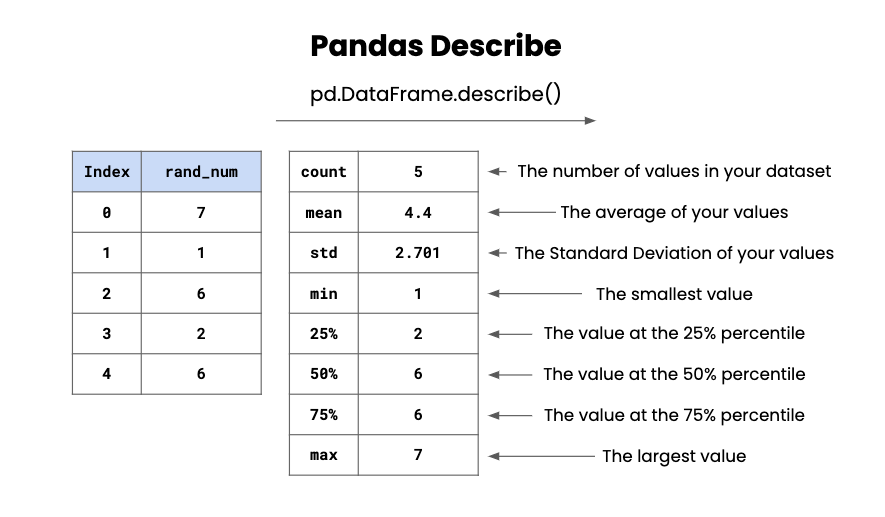

The describe() method returns description of the data in the DataFrame.



If the DataFrame contains numerical data, the description contains these information for each column:



    count - The number of not-empty values.

    mean - The average (mean) value.

    std - The standard deviation.

    min - the minimum value.

    25% - The 25% percentile*.

    50% - The 50% percentile*.

    75% - The 75% percentile*.

    max - the maximum value.



*Percentile meaning: how many of the values are less than the given percentile.

In [55]:
df[["clean_comment", "category"]].describe(include='all')

clean_comment  category
count         200125    200222
unique        199715         3
top                   Positive
freq             116     88080

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Checking for Null Value</p>



<a id='sectionfour-three'></a>

At the base level, pandas offers two functions to test for missing data, **isnull()** and **notnull()**. As you may suspect, these are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.





In addition to the above functions, pandas also provides two methods to check for missing data on Series and DataFrame objects. These methods evaluate each object in the Series or DataFrame and provide a **boolean value** indicating if the data is missing or not.

In [56]:
df.isnull().sum()

clean_comment    104
category           7
word_count       104
dtype: int64

There are **104** missing in comment section and **7** in category. This will be taken cae in next cell


## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Dropping NULL</p>



<a id='sectionfour-four'></a>

In [57]:
df = df.dropna()

df.shape

(200118, 3)

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Abbreveation Creation</p>



<a id='sectionfour-five'></a>

In [58]:
abbreviations = {

    "$" : " dollar ",

    "€" : " euro ",

    "4ao" : "for adults only",

    "a.m" : "before midday",

    "a3" : "anytime anywhere anyplace",

    "aamof" : "as a matter of fact",

    "acct" : "account",

    "adih" : "another day in hell",

    "afaic" : "as far as i am concerned",

    "afaict" : "as far as i can tell",

    "afaik" : "as far as i know",

    "afair" : "as far as i remember",

    "afk" : "away from keyboard",

    "app" : "application",

    "approx" : "approximately",

    "apps" : "applications",

    "asap" : "as soon as possible",

    "asl" : "age, sex, location",

    "atk" : "at the keyboard",

    "ave." : "avenue",

    "aymm" : "are you my mother",

    "ayor" : "at your own risk", 

    "b&b" : "bed and breakfast",

    "b+b" : "bed and breakfast",

    "b.c" : "before christ",

    "b2b" : "business to business",

    "b2c" : "business to customer",

    "b4" : "before",

    "b4n" : "bye for now",

    "b@u" : "back at you",

    "bae" : "before anyone else",

    "bak" : "back at keyboard",

    "bbbg" : "bye bye be good",

    "bbc" : "british broadcasting corporation",

    "bbias" : "be back in a second",

    "bbl" : "be back later",

    "bbs" : "be back soon",

    "be4" : "before",

    "bfn" : "bye for now",

    "blvd" : "boulevard",

    "bout" : "about",

    "brb" : "be right back",

    "bros" : "brothers",

    "brt" : "be right there",

    "bsaaw" : "big smile and a wink",

    "btw" : "by the way",

    "bwl" : "bursting with laughter",

    "c/o" : "care of",

    "cet" : "central european time",

    "cf" : "compare",

    "cia" : "central intelligence agency",

    "csl" : "can not stop laughing",

    "cu" : "see you",

    "cul8r" : "see you later",

    "cv" : "curriculum vitae",

    "cwot" : "complete waste of time",

    "cya" : "see you",

    "cyt" : "see you tomorrow",

    "dae" : "does anyone else",

    "dbmib" : "do not bother me i am busy",

    "diy" : "do it yourself",

    "dm" : "direct message",

    "dwh" : "during work hours",

    "e123" : "easy as one two three",

    "eet" : "eastern european time",

    "eg" : "example",

    "embm" : "early morning business meeting",

    "encl" : "enclosed",

    "encl." : "enclosed",

    "etc" : "and so on",

    "faq" : "frequently asked questions",

    "fawc" : "for anyone who cares",

    "fb" : "facebook",

    "fc" : "fingers crossed",

    "fig" : "figure",

    "fimh" : "forever in my heart", 

    "ft." : "feet",

    "ft" : "featuring",

    "ftl" : "for the loss",

    "ftw" : "for the win",

    "fwiw" : "for what it is worth",

    "fyi" : "for your information",

    "g9" : "genius",

    "gahoy" : "get a hold of yourself",

    "gal" : "get a life",

    "gcse" : "general certificate of secondary education",

    "gfn" : "gone for now",

    "gg" : "good game",

    "gl" : "good luck",

    "glhf" : "good luck have fun",

    "gmt" : "greenwich mean time",

    "gmta" : "great minds think alike",

    "gn" : "good night",

    "g.o.a.t" : "greatest of all time",

    "goat" : "greatest of all time",

    "goi" : "get over it",

    "gps" : "global positioning system",

    "gr8" : "great",

    "gratz" : "congratulations",

    "gyal" : "girl",

    "h&c" : "hot and cold",

    "hp" : "horsepower",

    "hr" : "hour",

    "hrh" : "his royal highness",

    "ht" : "height",

    "ibrb" : "i will be right back",

    "ic" : "i see",

    "icq" : "i seek you",

    "icymi" : "in case you missed it",

    "idc" : "i do not care",

    "idgadf" : "i do not give a damn fuck",

    "idgaf" : "i do not give a fuck",

    "idk" : "i do not know",

    "ie" : "that is",

    "i.e" : "that is",

    "ifyp" : "i feel your pain",

    "IG" : "instagram",

    "iirc" : "if i remember correctly",

    "ilu" : "i love you",

    "ily" : "i love you",

    "imho" : "in my humble opinion",

    "imo" : "in my opinion",

    "imu" : "i miss you",

    "iow" : "in other words",

    "irl" : "in real life",

    "j4f" : "just for fun",

    "jic" : "just in case",

    "jk" : "just kidding",

    "jsyk" : "just so you know",

    "l8r" : "later",

    "lb" : "pound",

    "lbs" : "pounds",

    "ldr" : "long distance relationship",

    "lmao" : "laugh my ass off",

    "lmfao" : "laugh my fucking ass off",

    "lol" : "laughing out loud",

    "ltd" : "limited",

    "ltns" : "long time no see",

    "m8" : "mate",

    "mf" : "motherfucker",

    "mfs" : "motherfuckers",

    "mfw" : "my face when",

    "mofo" : "motherfucker",

    "mph" : "miles per hour",

    "mr" : "mister",

    "mrw" : "my reaction when",

    "ms" : "miss",

    "mte" : "my thoughts exactly",

    "nagi" : "not a good idea",

    "nbc" : "national broadcasting company",

    "nbd" : "not big deal",

    "nfs" : "not for sale",

    "ngl" : "not going to lie",

    "nhs" : "national health service",

    "nrn" : "no reply necessary",

    "nsfl" : "not safe for life",

    "nsfw" : "not safe for work",

    "nth" : "nice to have",

    "nvr" : "never",

    "nyc" : "new york city",

    "oc" : "original content",

    "og" : "original",

    "ohp" : "overhead projector",

    "oic" : "oh i see",

    "omdb" : "over my dead body",

    "omg" : "oh my god",

    "omw" : "on my way",

    "p.a" : "per annum",

    "p.m" : "after midday",

    "pm" : "prime minister",

    "poc" : "people of color",

    "pov" : "point of view",

    "pp" : "pages",

    "ppl" : "people",

    "prw" : "parents are watching",

    "ps" : "postscript",

    "pt" : "point",

    "ptb" : "please text back",

    "pto" : "please turn over",

    "qpsa" : "what happens", #"que pasa",

    "ratchet" : "rude",

    "rbtl" : "read between the lines",

    "rlrt" : "real life retweet", 

    "rofl" : "rolling on the floor laughing",

    "roflol" : "rolling on the floor laughing out loud",

    "rotflmao" : "rolling on the floor laughing my ass off",

    "rt" : "retweet",

    "ruok" : "are you ok",

    "sfw" : "safe for work",

    "sk8" : "skate",

    "smh" : "shake my head",

    "sq" : "square",

    "srsly" : "seriously", 

    "ssdd" : "same stuff different day",

    "tbh" : "to be honest",

    "tbs" : "tablespooful",

    "tbsp" : "tablespooful",

    "tfw" : "that feeling when",

    "thks" : "thank you",

    "tho" : "though",

    "thx" : "thank you",

    "tia" : "thanks in advance",

    "til" : "today i learned",

    "tl;dr" : "too long i did not read",

    "tldr" : "too long i did not read",

    "tmb" : "tweet me back",

    "tntl" : "trying not to laugh",

    "ttyl" : "talk to you later",

    "u" : "you",

    "u2" : "you too",

    "u4e" : "yours for ever",

    "utc" : "coordinated universal time",

    "w/" : "with",

    "w/o" : "without",

    "w8" : "wait",

    "wassup" : "what is up",

    "wb" : "welcome back",

    "wtf" : "what the fuck",

    "wtg" : "way to go",

    "wtpa" : "where the party at",

    "wuf" : "where are you from",

    "wuzup" : "what is up",

    "wywh" : "wish you were here",

    "yd" : "yard",

    "ygtr" : "you got that right",

    "ynk" : "you never know",

    "zzz" : "sleeping bored and tired"

}



## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Generating Word Coud</p>



<a id='sectionfour-six'></a>

**Word Cloud** is basically the pictorial representation of collective words which will be used for a specific task. in our case it is a removal of stop words.

Why we are removing stop words ?? it's becasue these stop words does not mean anything in context to sentences hence it is not necessory when we compose the meanings of the sentences.

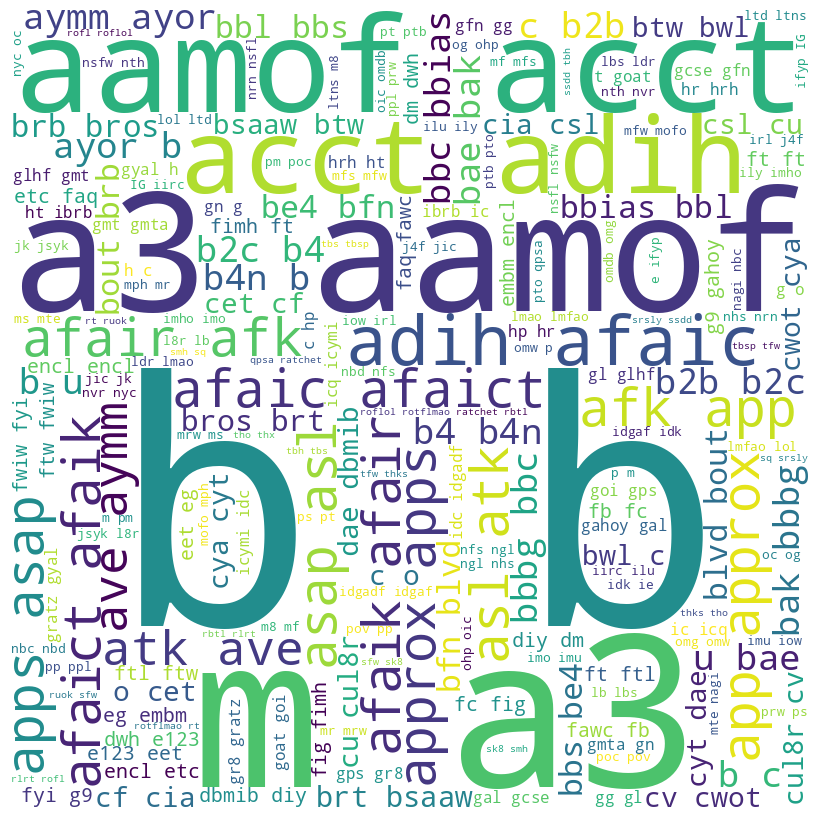

In [59]:
#Generating Word Coud



token = list(abbreviations.keys())

comment_words = ''

stopWords = set(STOPWORDS)





for i in range(len(token)):

    token[i] = token[i].lower()

      

    comment_words += " ".join(token)+" "

    

wordcloud = WordCloud(width = 800, height = 800,

                background_color ='white',

                stopwords = stopWords,

                min_font_size = 10).generate(comment_words)

  

# plot the WordCloud image                       

plt.figure(figsize = (8, 8), facecolor = None)

plt.imshow(wordcloud)

plt.axis("off")

plt.tight_layout(pad = 0)

  

plt.show()

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Filters</p>



<a id='sectionfour-seven'></a>

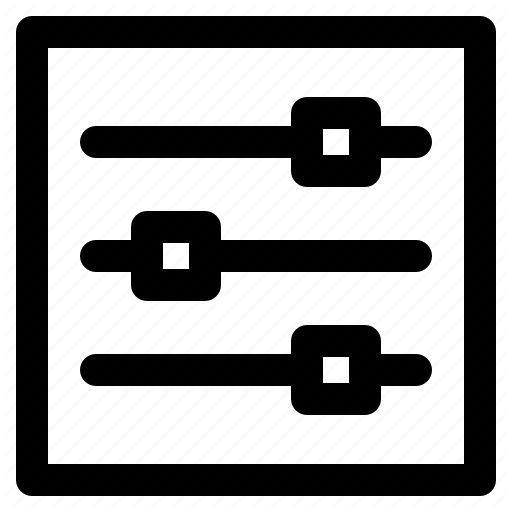

Filters

The purpose of these filters to ignore and remove such tokens or words which does not contribute when it comes to classification. It will create only noise if not removed.

A clean text reprepresents much more meaning then with noises, hence include few common filters used.



    Removing url

    Removing HTML

    Removing Not_Ascii

    Removing Word Abbreveations

    Removing Mentions

    Removing Numbers

    Removing Emojis : Sad, Smile and Heart

    Removing Elongated Words

    Removing Punctuations

    Lemmatization/ Stemming

    

The above all should take care of our most of the textual problems!!

In [60]:
# Remove all URLs, replace by URL

def remove_URL(text):

    url = re.compile(r'https?://\S+|www\.\S+')

    return url.sub(r'URL',str(text))





# Remove HTML beacon

def remove_HTML(text):

    html=re.compile(r'<.*?>')

    return html.sub(r'',text)



# Remove non printable characters

def remove_not_ASCII(text):

    text = ''.join([word for word in text if word in string.printable])

    return text



# Change an abbreviation by its true meaning

def word_abbrev(word):

    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word



# Replace all abbreviations

def replace_abbrev(text):

    string = ""

    for word in text.split():

        string += word_abbrev(word) + " "        

    return string



# Remove @ and mention, replace by USER

def remove_mention(text):

    at=re.compile(r'@\S+')

    return at.sub(r'USER',text)

                     



# Remove numbers, replace it by NUMBER

def remove_number(text):

    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')

    return num.sub(r'NUMBER', text)







# Replace some others smileys with SADFACE

def transcription_sad(text):

    eyes = "[8:=;]"

    nose = "['`\-]"

    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')

    return smiley.sub(r'SADFACE', text)





# Replace some smileys with SMILE

def transcription_smile(text):

    eyes = "[8:=;]"

    nose = "['`\-]"

    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')

    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')

    return smiley.sub(r'SMILE', text)





# Replace <3 with HEART

def transcription_heart(text):

    heart = re.compile(r'<3')

    return heart.sub(r'HEART', text)





# Factorize elongated words, add ELONG

def remove_elongated_words(text):

    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')

    return rep.sub(r'\1\2 ELONG', text)





# Factorize repeated punctuation, add REPEAT

def remove_repeat_punct(text):

    rep = re.compile(r'([!?.]){2,}')

    return rep.sub(r'\1 REPEAT', text)







# Remove all punctuations

def remove_all_punct(text):

    table = str.maketrans('','',string.punctuation)

    return text.translate(table)





# Remove punctuations

def remove_punct(text):

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" 

    for p in punctuations:

        text = text.replace(p, f' {p} ')



    text = text.replace('...', ' ... ')

    if '...' not in text:

        text = text.replace('..', ' ... ')   

    return text





# Remove all english stopwords

def remove_stopwords(text):

    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])

    return text



def stemming(text):

    ps = PorterStemmer()

    text = ' '.join([ps.stem(word) for word in text.split()])

    return text



def lemmatization(text):

    lm= WordNetLemmatizer()

    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])

    return text


In [61]:
def clean_text(text):

    

    # Remove non text

    text = remove_URL(text)

    text = remove_HTML(text)

    text = remove_not_ASCII(text)

    

    # Lower text, replace abbreviations

    text = replace_abbrev(text)  

    text = remove_mention(text)

    text = remove_number(text)

    

    # Remove  smileys



    text = transcription_sad(text)

    text = transcription_smile(text)

    text = transcription_heart(text)

    

    # Remove repeated puntuations / words

    text = remove_elongated_words(text)

    text = remove_repeat_punct(text)



    text = remove_all_punct(text)

    text = remove_punct(text)

    text = lemmatization(text)

    text = text.lower()



    return text

In [62]:
df["clean_comment"] = df["clean_comment"].apply(clean_text)

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Calculate Maximum Sequence Length</p>



<a id='sectionfour-eight'></a>

In [63]:
g=[]

for i in df['clean_comment']:

    g.append(i)

In [64]:
maxl = max([len(s) for s in g])

print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 8376


## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Tokenization & Padding</p>



<a id='sectionfour-nine'></a>

In [65]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

tokenizer.fit_on_texts(df['clean_comment'].values)

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 116776 unique tokens.


In [66]:
maxl = 3000

X = tokenizer.texts_to_sequences(df['clean_comment'].values)

X = pad_sequences(X, maxlen=maxl)

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Transforming Target Label</p>



<a id='sectionfour-ten'></a>

In [67]:
Y = pd.get_dummies(df['category'],columns=df["category"]).values

In [68]:
lb = LabelBinarizer().fit(list(set(df['category'].tolist())))

<a id = 'sectionfive'></a>



# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Model Architecture</p>




## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Dense Architenture</p>



<a id='sectionfive-one'></a>

In [70]:
import tensorflow as tf

# Initialize TPU
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    print("TPU initialized successfully")
except Exception as e:
    print(f"Failed to initialize TPU: {e}")

# Create TPU strategy
tpu_strategy = tf.distribute.TPUStrategy(resolver)

# Define your model within the TPU strategy scope
with tpu_strategy.scope():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(1000, 100, input_length=maxl))
    model.add(tf.keras.layers.SpatialDropout1D(0.2))
    model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Now you can proceed to train your model


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1729365711.941803      12 service.cc:145] XLA service 0x5a52d1399320 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729365711.941866      12 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1729365711.941871      12 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1729365711.941882      12 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1729365711.941885      12 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1729365711.941887      12 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1729365711.941890      12 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1729365711.941892      12 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1729365711.941895      12 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.
TPU initialized successfully
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task

/usr/local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.

I0000 00:00:1729365716.481876      12 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Model Summary</p>



<a id='sectionfive-two'></a>

In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Model Vizualization</p>



<a id='sectionfive-three'></a>

In [77]:
# !pip install pydot graphviz

In [78]:
# from tensorflow.keras.utils import plot_model

In [79]:
# plot_model(model, show_shapes=True, show_layer_names=True)

<a id='sectionsix'></a>



# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Training</p>




## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Setting Up Early Stopping Callback</p>



<a id='sectionsix-one'></a>

In **machine learning**, **early stopping** is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration.

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Train Test Split</p>



<a id = 'sectionsix'></a>

Train , Test and Validation Split is necessory for the evaluation purose.



The main idea of splitting the dataset into a validation set is to prevent our model from overfitting i.e., the model becomes really good at classifying the samples in the training set but cannot generalize and make accurate classifications on the data it has not seen before.

In [80]:
from sklearn.model_selection import train_test_split

train_x, test_x , train_y, test_y = train_test_split(X, Y, test_size=.3)

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Fitting</p>





<a id = 'sectionsix-three'></a>

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(train_x, train_y, epochs=5, batch_size=10*tpu_strategy.num_replicas_in_sync, validation_split=0.15, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5


2024-10-19 19:26:13.507831: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1729365973.796165    1030 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(638785441e48b485:0:0), session_name()
I0000 00:00:1729365979.116997    1030 tpu_compile_op_common.cc:245] Compilation of 638785441e48b485:0:0 with session name  took 5.320784649s and succeeded
I0000 00:00:1729365979.141983    1030 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(638785441e48b485:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_12372815375710998311", property.function_library_fingerprint = 15282874970801587482, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z 

1488/1489 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.7103 - loss: 0.6937

I0000 00:00:1729366960.168281     960 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(eff8d0c91edb210d:0:0), session_name()
I0000 00:00:1729366965.259382     960 tpu_compile_op_common.cc:245] Compilation of eff8d0c91edb210d:0:0 with session name  took 5.091047142s and succeeded
I0000 00:00:1729366965.282461     960 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(eff8d0c91edb210d:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_12372815375710998311", property.function_library_fingerprint = 15282874970801587482, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "4,3000,;4,3,;", property.guaranteed_constants_size = 0, embedding

1489/1489 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.7103 - loss: 0.6936

2024-10-19 19:42:47.903138: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1729366968.112262     991 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(7345f94e8341a65e:0:0), session_name()
I0000 00:00:1729366969.072030     991 tpu_compile_op_common.cc:245] Compilation of 7345f94e8341a65e:0:0 with session name  took 959.722741ms and succeeded
I0000 00:00:1729366969.074661     991 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(7345f94e8341a65e:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_10772450196908179454", property.function_library_fingerprint = 6445149117025770885, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, t

1489/1489 ━━━━━━━━━━━━━━━━━━━━ 1009s 673ms/step - accuracy: 0.7104 - loss: 0.6936 - val_accuracy: 0.8215 - val_loss: 0.4850
Epoch 2/5


I0000 00:00:1729366981.354716    1050 tpu_compile_op_common.cc:245] Compilation of de9e390a7ebd06f2:0:0 with session name  took 635.59817ms and succeeded
I0000 00:00:1729366981.357836    1050 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(de9e390a7ebd06f2:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_10772450196908179454", property.function_library_fingerprint = 6445149117025770885, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topology.wrap().x = false, topology.wrap().y = false, topology.wrap().z = false, std::string(property.shapes_prefix) = "7,3000,;7,3,;", property.guaranteed_constants_size = 0, embedding_partitions_fingerprint = "1688352644216761960")
I0000 00:00:1729366981.357861    1050 tpu_compilation_cache_interface.cc:541] After adding entry for key de9e390

1489/1489 ━━━━━━━━━━━━━━━━━━━━ 995s 668ms/step - accuracy: 0.8208 - loss: 0.4964 - val_accuracy: 0.8257 - val_loss: 0.4754
Epoch 3/5
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 994s 668ms/step - accuracy: 0.8239 - loss: 0.4863 - val_accuracy: 0.8306 - val_loss: 0.4610
Epoch 4/5
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 995s 668ms/step - accuracy: 0.8328 - loss: 0.4558 - val_accuracy: 0.8321 - val_loss: 0.4584
Epoch 5/5
1489/1489 ━━━━━━━━━━━━━━━━━━━━ 995s 668ms/step - accuracy: 0.8375 - loss: 0.4532 - val_accuracy: 0.8375 - val_loss: 0.4529


<a id='sectionseven'></a>



# <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Training Evaluation</p>




## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Training Loss vs Validation Loss</p>



<a id = 'sectionseven-one'></a>

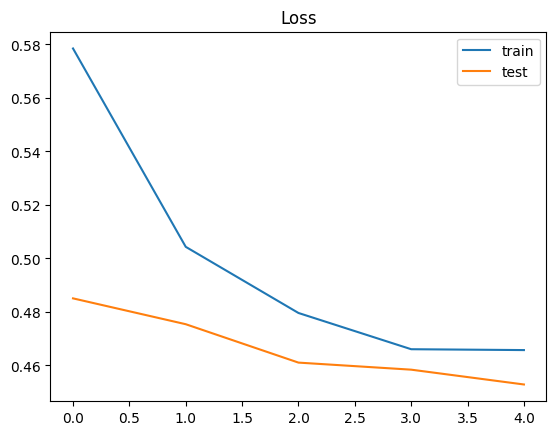

In [82]:
plt.title('Loss')

plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')

plt.legend()

plt.show();

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Training Accuracy vs Validation Accuracy</p>



<a id = 'sectionseven-two'></a>

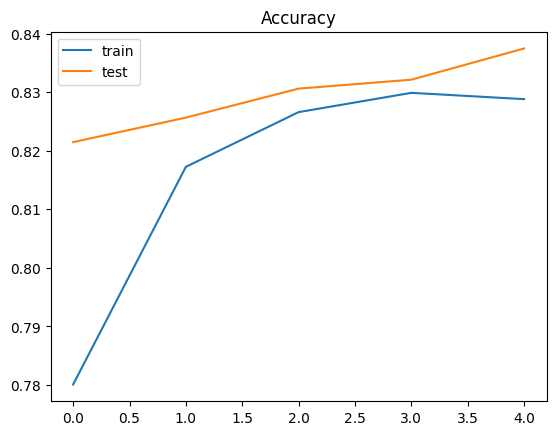

In [83]:
plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='train')

plt.plot(history.history['val_accuracy'], label='test')

plt.legend()

plt.show();

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">ROC Curve</p>



<a id = 'sectionseven-three'></a>

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.

1877/1877 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step


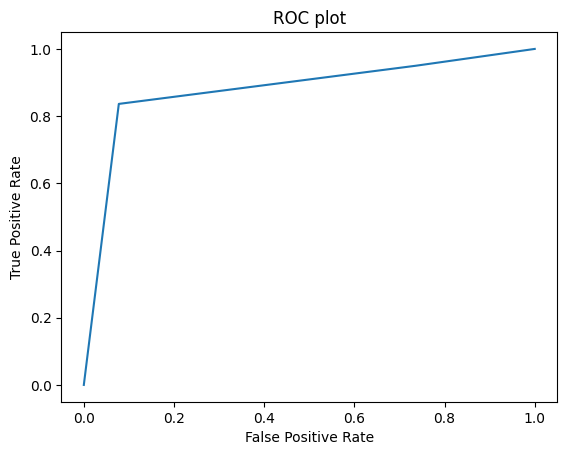

In [85]:
#ROC Curve

fpr, tpr, _ = roc_curve(test_y.argmax(axis=1),model.predict(test_x).argmax(axis=1), pos_label=2)

plt.plot(fpr,tpr)

plt.title("ROC plot")

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Confusion Matrix</p>



<a id = 'sectionseven-four'></a>

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature

1877/1877 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step


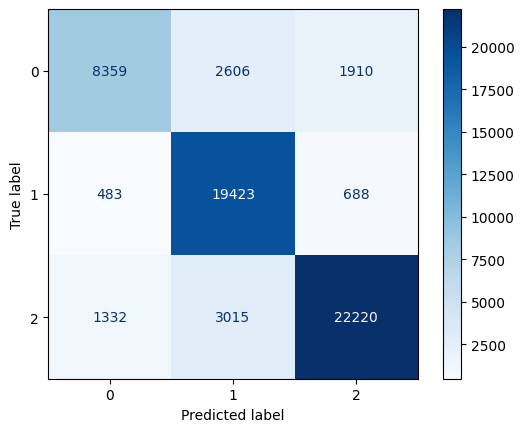

In [86]:
# Confusion Matrix

cm_rm_2 = confusion_matrix((test_y).argmax(axis=1),model.predict(test_x).argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rm_2)

disp.plot(cmap=plt.cm.Blues)

plt.show()

## <p style="padding:10px;background:orange;margin:10;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 1px 1px;overflow:hidden;font-weight:50">Classification Report</p>



<a id = 'sectionseven-five'></a>

In [87]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(test_y.argmax(axis=1),model.predict(test_x).argmax(axis=1)))

1877/1877 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step
              precision    recall  f1-score   support

           0       0.82      0.65      0.73     12875
           1       0.78      0.94      0.85     20594
           2       0.90      0.84      0.86     26567

    accuracy                           0.83     60036
   macro avg       0.83      0.81      0.81     60036
weighted avg       0.84      0.83      0.83     60036



In [93]:
# Preprocess the input sentence
input_sentence = "This is fine bro just relax"
sequence = tokenizer.texts_to_sequences([input_sentence])
padded_sequence = pad_sequences(sequence, maxlen=maxl)

# Make prediction
predictions = model.predict(padded_sequence)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

sentiment_labels = {0: 'negative', 1: 'neutral', 2: 'positive'}
# Print the prediction
print(f"Predicted class: {sentiment_labels[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
Predicted class: neutral
